Creating and Backtesting simple Momentum/Contrarian Strategies


Getting the Data:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = "time")

In [10]:
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


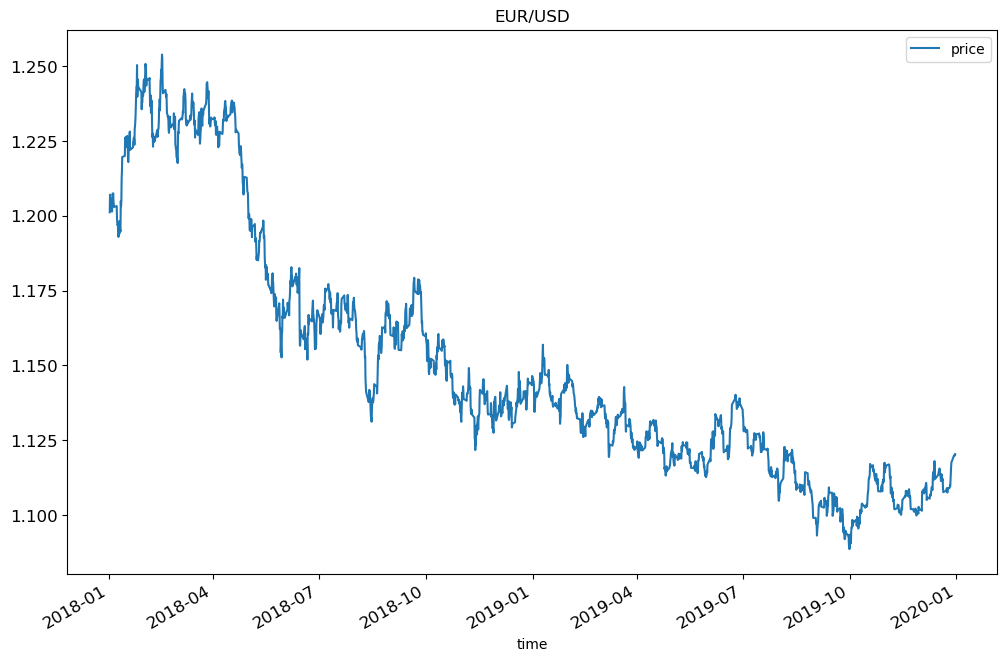

In [14]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

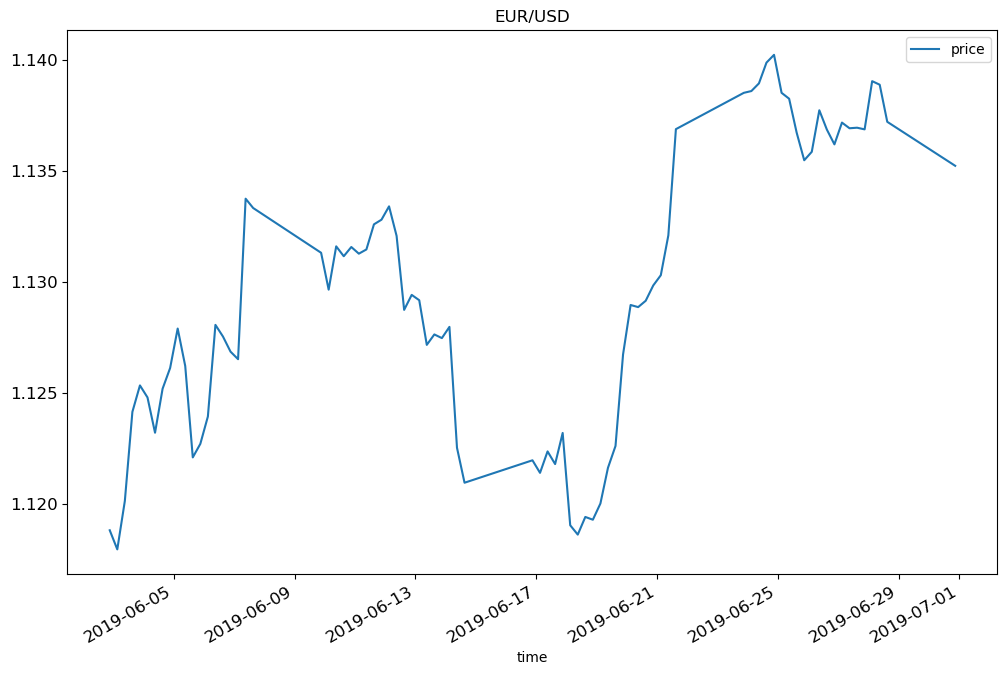

In [16]:
data.loc["2019-06"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [18]:
data["returns"] = np.log(data.div(data.shift(1)))

In [20]:
data.dropna(inplace = True)

In [22]:
data

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


Getting historical data from Oanda

In [47]:
import tpqoa
import os

In [73]:
file_path = r"C:\Users\audri\Desktop\AutoTrader\oanda\oanda.cfg"
print(os.path.exists(file_path))  # Should return True

True


In [75]:
api = tpqoa.tpqoa(r"C:\Users\audri\Desktop\AutoTrader\oanda\oanda.cfg")

In [77]:
api

In [81]:
df = api.get_history(instrument = "EUR_USD", start = "2021-01-14", end = "2021-01-15",
                    granularity = "M5", price = "B")

In [83]:
df

,o,h,l,c,volume,complete
time,,,,,,
2021-01-14 00:00:00,1.21611,1.21616,1.21594,1.21599,140,True
2021-01-14 00:05:00,1.21600,1.21605,1.21594,1.21605,29,True
2021-01-14 00:10:00,1.21606,1.21651,1.21606,1.21644,196,True
2021-01-14 00:15:00,1.21643,1.21677,1.21628,1.21677,163,True
2021-01-14 00:20:00,1.21674,1.21688,1.21670,1.21686,149,True
...,...,...,...,...,...,...
2021-01-14 23:35:00,1.21505,1.21517,1.21502,1.21516,39,True
2021-01-14 23:40:00,1.21515,1.21524,1.21504,1.21509,53,True
2021-01-14 23:45:00,1.21507,1.21520,1.21507,1.21511,31,True


In [87]:
close = df.c.to_frame()
close

,c
time,
2021-01-14 00:00:00,1.21599
2021-01-14 00:05:00,1.21605
2021-01-14 00:10:00,1.21644
2021-01-14 00:15:00,1.21677
2021-01-14 00:20:00,1.21686
...,...
2021-01-14 23:35:00,1.21516
2021-01-14 23:40:00,1.21509
2021-01-14 23:45:00,1.21511


In [89]:
close.resample("20min").last()

,c
time,
2021-01-14 00:00:00,1.21677
2021-01-14 00:20:00,1.21654
2021-01-14 00:40:00,1.21639
2021-01-14 01:00:00,1.21697
2021-01-14 01:20:00,1.21661
...,...
2021-01-14 22:20:00,1.21526
2021-01-14 22:40:00,1.21502
2021-01-14 23:00:00,1.21543
